# Anomaly Detection: credit card frauds 

In [335]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas_gbq as gbq
import scipy.stats as scs
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
project_dir= "E:/Python WD/ml_pipeline"
import os
os.chdir(project_dir)
df= pd.read_csv('E://Python WD/datasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [337]:
features= list(set(df.columns)- set([target]))
#features

In [338]:
target = "Class"

import anomaly_detection

X, Y, test_X, test_Y= anomaly_detection.split_data_X_Y(df, target)


## Analysing class distribution

<AxesSubplot:ylabel='Class'>

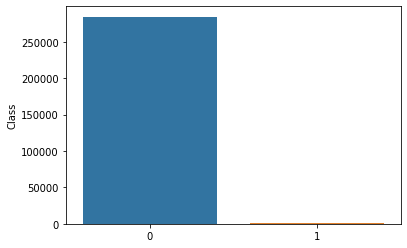

In [339]:
sns.barplot(x= df.Class.value_counts().index, y= df.Class.value_counts())

In [320]:
df.Class.value_counts()/df.Class.value_counts().sum()

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [364]:
import importlib
importlib.reload(anomaly_detection)

<module 'anomaly_detection' from 'E:\\Python WD\\ml_pipeline\\anomaly_detection.py'>

## setting contamination

In [340]:
### factor to quantify how much anomaly is expected in the data. Can be captured as a user input.
contamination= .002

## Selecting estimators

In [352]:


est_dict= {'CBLOF':True, 'IsolationForest':False, 'COPOD': True, 'LOF':True}


base_estimators= anomaly_detection.create_list_of_base_estimators(est_dict, contamination)


## Define fit and approximate model

In [363]:



model= anomaly_detection.define_fit_and_approximate_model(base_estimators, contamination, X)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   24.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.0s finished


## Predict anomalies in test data

In [385]:
df= test_X
df['Class']= test_Y
df['pred_Class']= pd.DataFrame(model.predict(df[features])).max(axis=1).values
df['pred_Class_prob']= pd.DataFrame(model.predict_proba(df[features])).max(axis=1).values
df

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   10.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   10.4s finished


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,pred_Class,pred_Class_prob,Class
38607,39460.0,-0.881164,-0.537194,2.479497,0.944675,-1.578208,1.136568,-0.043735,0.397746,-1.460387,...,0.327118,0.183838,0.044737,0.022493,0.109542,0.109897,225.53,0.0,0.083374,0
113302,73016.0,-0.885404,0.403891,0.730598,-1.655171,2.732323,3.410628,0.233018,0.713919,-0.353257,...,-0.220187,0.984244,0.270677,-0.002165,-0.295257,-0.141850,20.00,0.0,0.064696,0
154210,100915.0,1.936180,-0.559750,0.134698,0.385497,-0.871716,0.106497,-1.156510,0.186510,2.570330,...,0.291651,-0.454241,-0.656385,0.451330,-0.047002,-0.059189,14.95,0.0,0.369254,0
183158,125677.0,1.936207,-0.254931,-1.408383,-0.009918,0.820452,0.921576,-0.157472,0.265727,0.294221,...,0.331705,-1.627373,-0.453666,0.309517,-0.024677,-0.086909,1.98,0.0,0.102880,0
212422,138849.0,0.207577,0.305463,0.638783,-0.459451,0.024812,0.043566,0.370522,-0.286907,-1.699743,...,-0.207907,0.786499,-0.304110,0.085865,-0.152691,-0.097177,15.00,0.0,0.082842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209226,137466.0,-3.171973,-4.140356,-1.330196,-2.430524,3.776921,2.262511,-0.043671,0.954487,-1.403145,...,1.621337,0.602892,0.383459,-0.492428,0.055219,0.267830,515.37,0.0,0.133033,0
223831,143540.0,1.950538,-0.383888,-0.577527,0.330231,-0.357073,-0.326764,-0.351792,-0.104762,1.197187,...,0.239695,-0.674673,-0.324116,-0.588730,0.031595,-0.028417,50.00,0.0,0.047291,0
131391,79584.0,-0.953522,0.963324,1.081392,1.325564,-0.380723,0.264363,0.282349,0.702080,-0.627323,...,0.066690,0.217561,-0.128941,-0.251091,0.275770,0.123850,70.74,0.0,0.208626,0
158195,111077.0,1.906820,-1.180021,-0.430582,-0.727712,-0.901167,0.023420,-1.041608,-0.006211,1.020248,...,0.331408,0.631541,-0.578174,-0.586836,-0.037580,-0.029925,120.00,0.0,0.296891,0


## Assessing the performance

In [386]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, fbeta_score, confusion_matrix,roc_auc_score, plot_precision_recall_curve, plot_roc_curve


### ROC AUC

In [388]:
roc_auc_score(df.Class, df.pred_Class_prob)

0.8544113129213419

### Precision Recall fscore and support


In [ ]:

display(pd.DataFrame(precision_recall_fscore_support(df.Class, df['pred_Class']), index= ['precision', 'recall', 'f1', 'support'], columns= ['non_Fraud', 'Fraud']))

### Confusion matrix

In [390]:

display(pd.DataFrame(confusion_matrix(df.Class, df['pred_Class'])))

,0,1
0,56534,330
1,64,34


## Visualizing the anomalies

<AxesSubplot:xlabel='V5', ylabel='Amount'>

<AxesSubplot:xlabel='V8', ylabel='Amount'>

<AxesSubplot:xlabel='V4', ylabel='Amount'>

<AxesSubplot:xlabel='V15', ylabel='Amount'>

<AxesSubplot:xlabel='V19', ylabel='Amount'>

<AxesSubplot:xlabel='V17', ylabel='Amount'>

<AxesSubplot:xlabel='V27', ylabel='Amount'>

<AxesSubplot:xlabel='V28', ylabel='Amount'>

<AxesSubplot:xlabel='V6', ylabel='Amount'>

<AxesSubplot:xlabel='V1', ylabel='Amount'>

<AxesSubplot:xlabel='V9', ylabel='Amount'>

<AxesSubplot:xlabel='V2', ylabel='Amount'>

<AxesSubplot:xlabel='V11', ylabel='Amount'>

<AxesSubplot:xlabel='V18', ylabel='Amount'>

<AxesSubplot:xlabel='V21', ylabel='Amount'>

<AxesSubplot:xlabel='V12', ylabel='Amount'>

<AxesSubplot:xlabel='V20', ylabel='Amount'>

<AxesSubplot:xlabel='V13', ylabel='Amount'>

<AxesSubplot:xlabel='V16', ylabel='Amount'>

<AxesSubplot:xlabel='V23', ylabel='Amount'>

<AxesSubplot:xlabel='V7', ylabel='Amount'>

<AxesSubplot:xlabel='V25', ylabel='Amount'>

<AxesSubplot:xlabel='V24', ylabel='Amount'>

<AxesSubplot:xlabel='V14', ylabel='Amount'>

<AxesSubplot:xlabel='V26', ylabel='Amount'>

<AxesSubplot:xlabel='V10', ylabel='Amount'>

<AxesSubplot:xlabel='V22', ylabel='Amount'>

<AxesSubplot:xlabel='V3', ylabel='Amount'>

<AxesSubplot:xlabel='Amount', ylabel='Amount'>

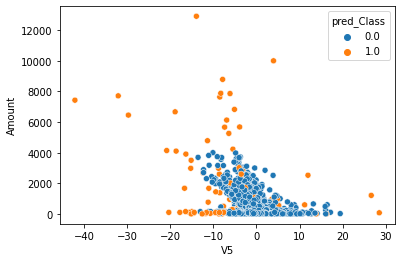

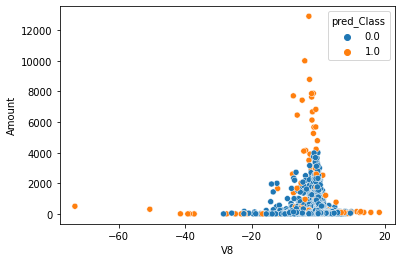

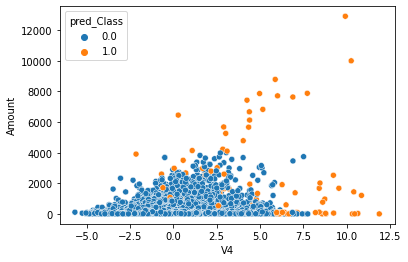

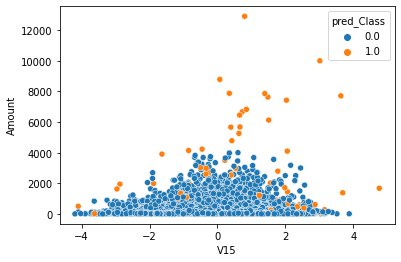

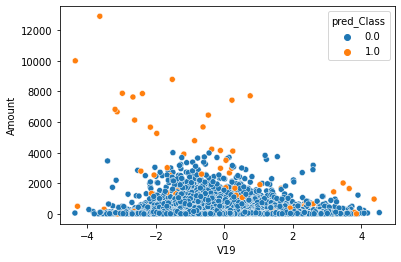

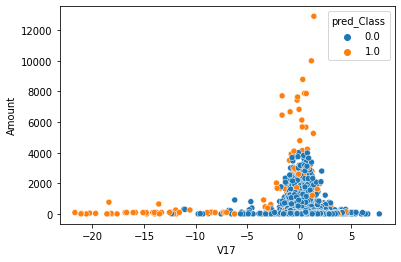

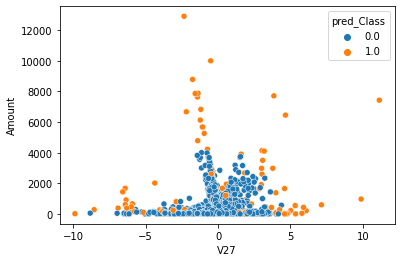

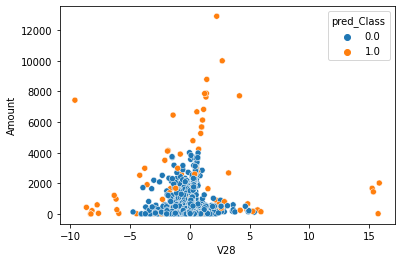

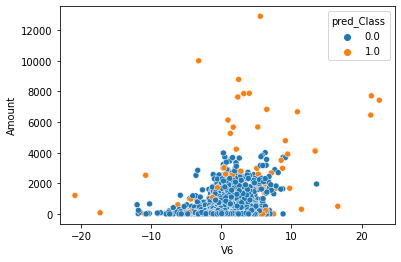

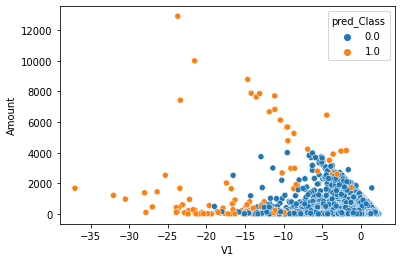

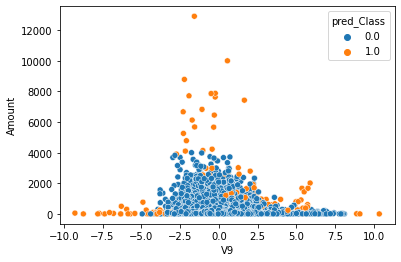

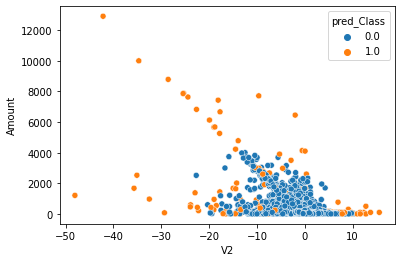

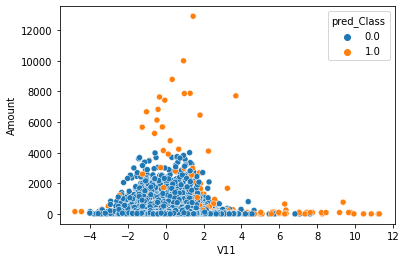

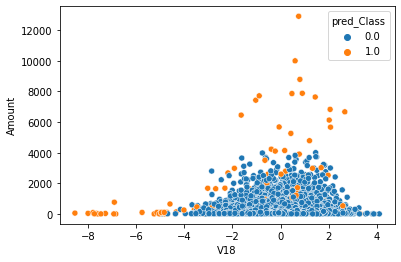

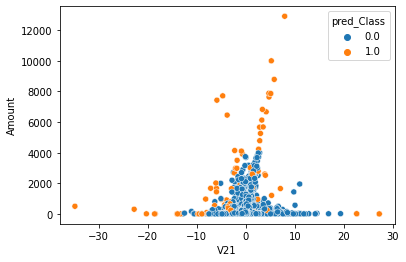

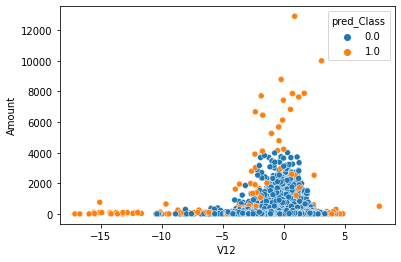

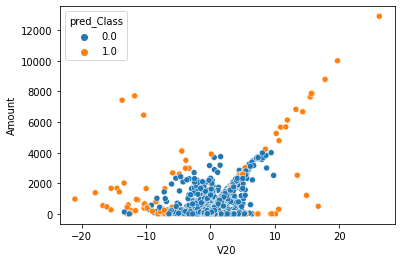

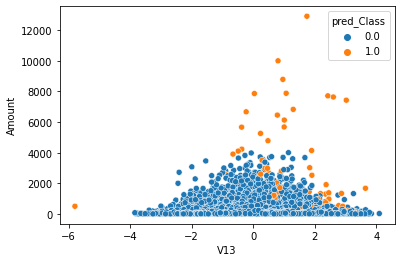

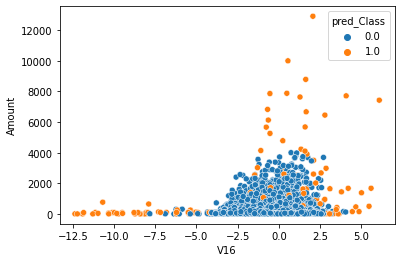

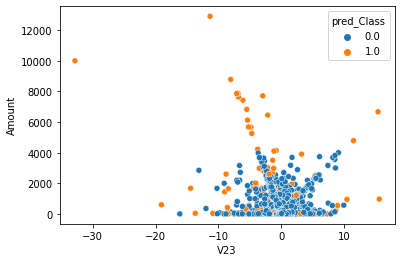

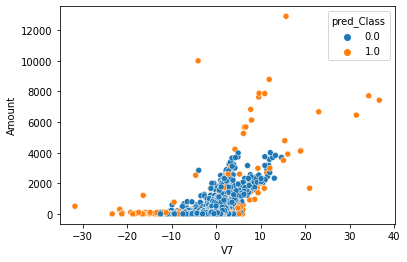

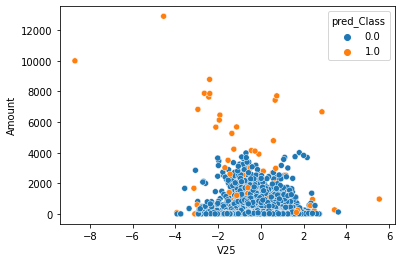

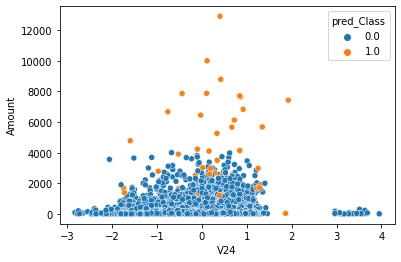

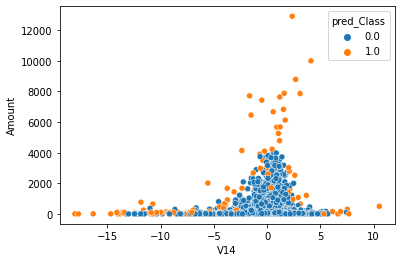

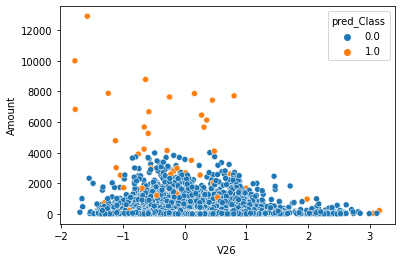

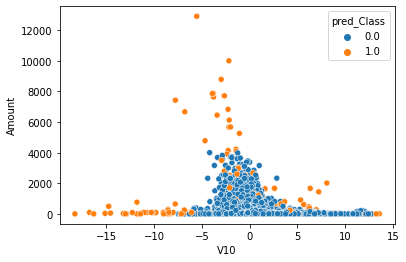

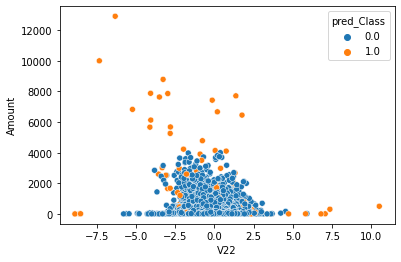

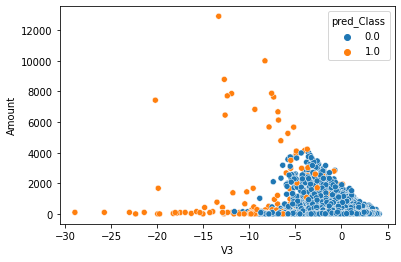

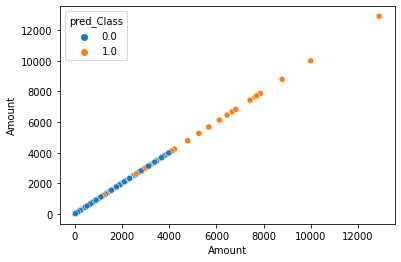

In [391]:
s1= pd.Series()
for col in features[1:]:
    fig= plt.figure()
    display(sns.scatterplot(x= df[col], y= df.Amount, hue= df.pred_Class))
    #plt.show()
    s1[col]= fig
    